In [1]:
import sys

package_path = '..'
if package_path not in sys.path:
    sys.path.append(package_path)

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from src.config.config import load_config
from src.processor.loader import HDF5FileLoader
from src.utils.file_util import get_run_scan_directory

In [4]:
config = load_config()
load_dir = config.path.load_dir
file = get_run_scan_directory(load_dir, 144, 1, 1)
loader = HDF5FileLoader(file)
data = loader.get_data()

poff_images = data["poff"]
poff_qbpm = data["poff_qbpm"]
print(f"{poff_images.shape=}")
print(f"{poff_qbpm.shape=}")

KeyError: 'poff'

C:\Users\11HOME_AHCI\AppData\Local\Temp\ipykernel_13288\4126978682.py:2: RuntimeWarning: invalid value encountered in log1p
  ax.imshow(np.log1p(poff_images.sum(0)))


Text(0.5, 1.0, 'Pump Off Images Sum')

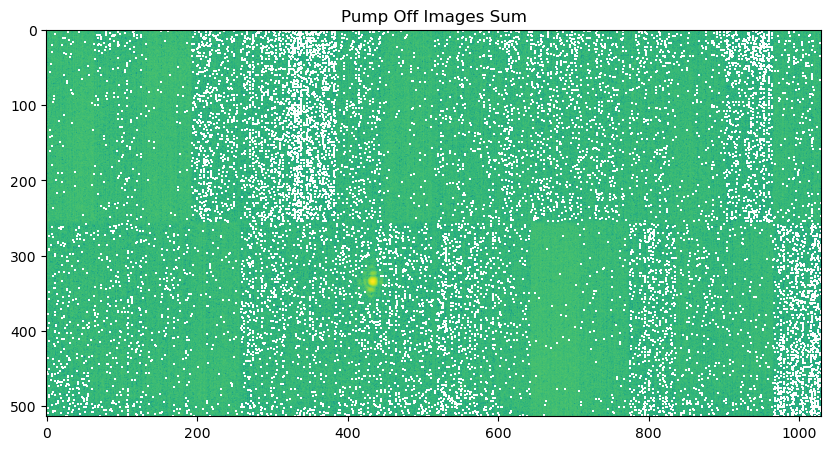

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(np.log1p(poff_images.sum(0)))
ax.set_title("Pump Off Images Sum")

C:\Users\11HOME_AHCI\AppData\Local\Temp\ipykernel_13288\346082015.py:7: RuntimeWarning: invalid value encountered in log1p
  ax.imshow(np.log1p(poff_roi_images.sum(0)))


Text(0.5, 1.0, 'Pump Off ROI Images Sum ((380, 300, 480, 380))')

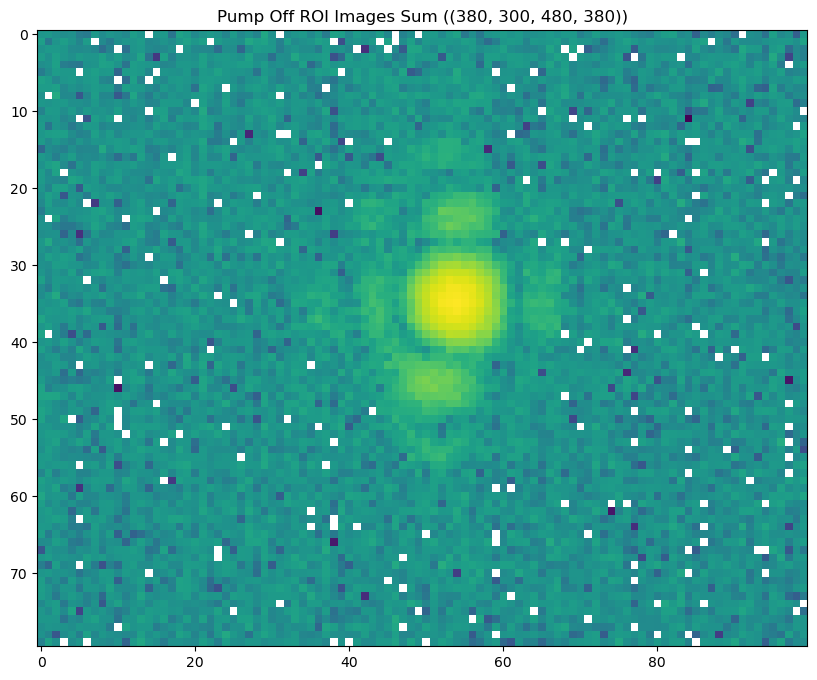

In [25]:
from roi_rectangle import RoiRectangle

roi_rect = RoiRectangle(380, 300, 480, 380)
poff_roi_images = roi_rect.slice(poff_images)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(np.log1p(poff_roi_images.sum(0)))
ax.set_title(f"Pump Off ROI Images Sum ({roi_rect.to_tuple()})")

Text(0.5, 1.0, 'Pump Off QBPM-Intensity')

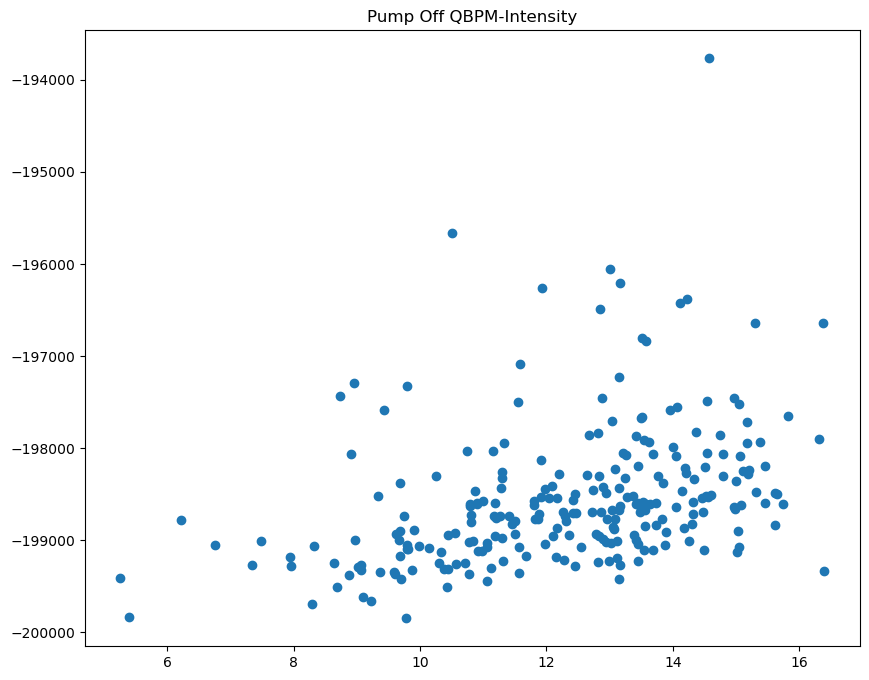

In [26]:
intensities = poff_roi_images.sum(axis=(1, 2))
delays = loader.delay
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(poff_qbpm, intensities)
ax.set_title(f"Pump Off QBPM-Intensity")

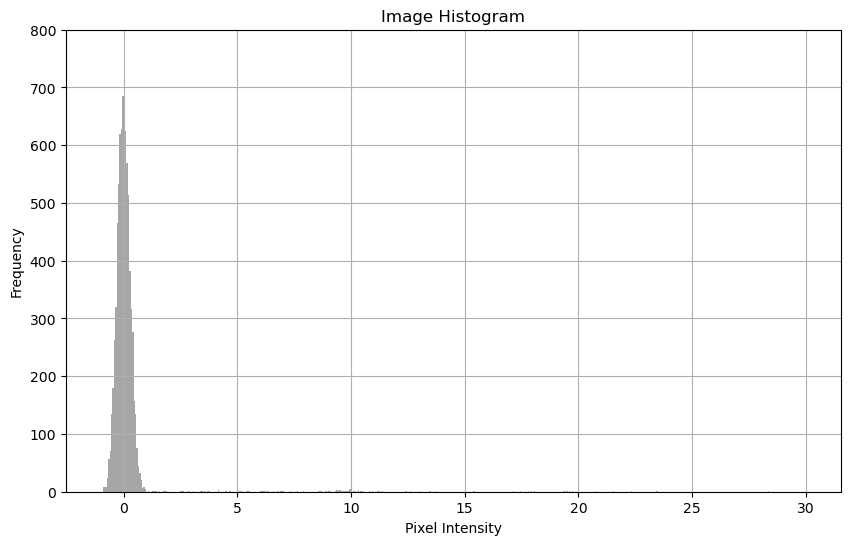

In [36]:
image = poff_roi_images[0]

hist, bins = np.histogram(image.flatten(), bins=500, range=[-1,30])

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(image.flatten(), bins=500, range=[-1,30], color='gray', alpha=0.7)
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.ylim(None, 800)
plt.grid(True)
plt.show()

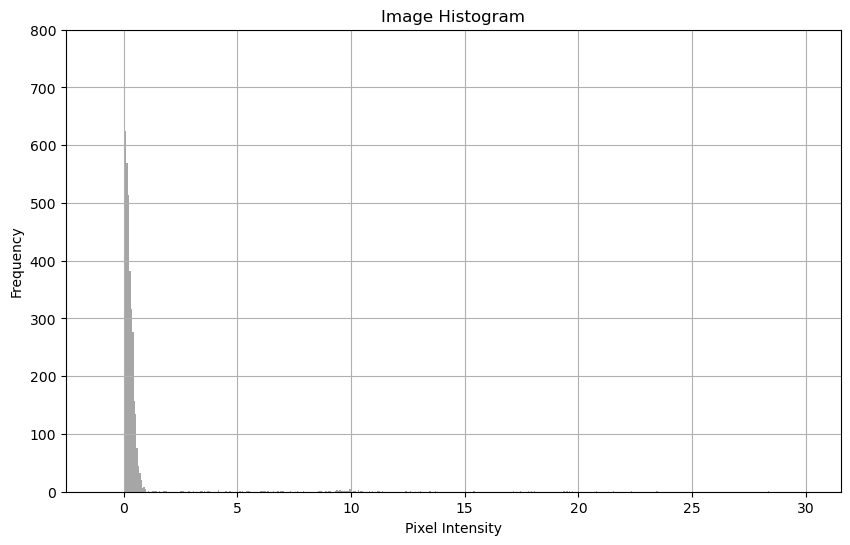

In [35]:
image = np.maximum(poff_roi_images[0], 0)

hist, bins = np.histogram(image.flatten(), bins=500, range=[-1,30])

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(image.flatten(), bins=500, range=[-1,30], color='gray', alpha=0.7)
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.ylim(None, 800)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Pump Off ROI Images Sum ((380, 300, 480, 380))')

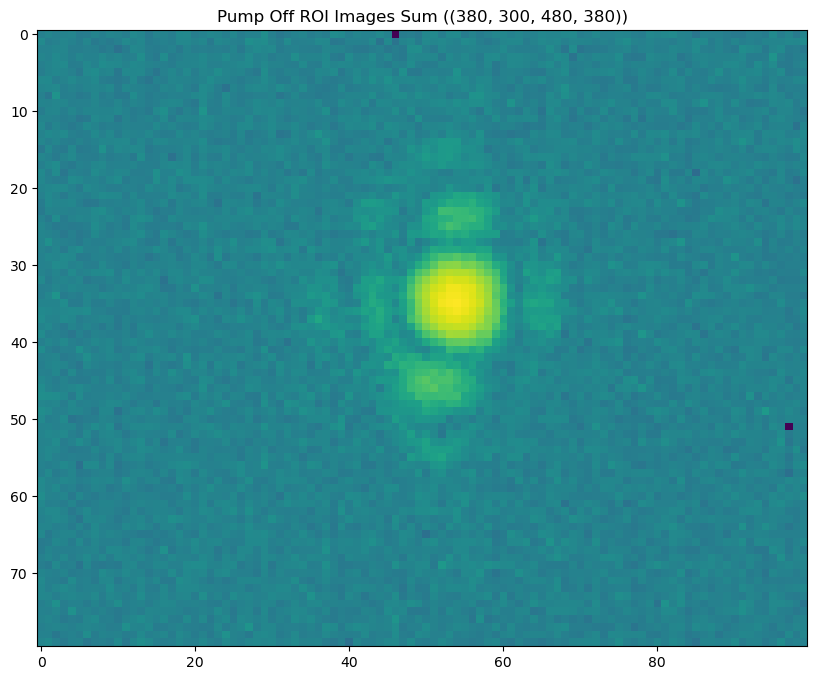

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(np.log1p(np.maximum(poff_roi_images, 0).sum(0)))
ax.set_title(f"Pump Off ROI Images Sum ({roi_rect.to_tuple()})")

Text(0.5, 1.0, 'Pump Off Roi Images Sum sub Dark')

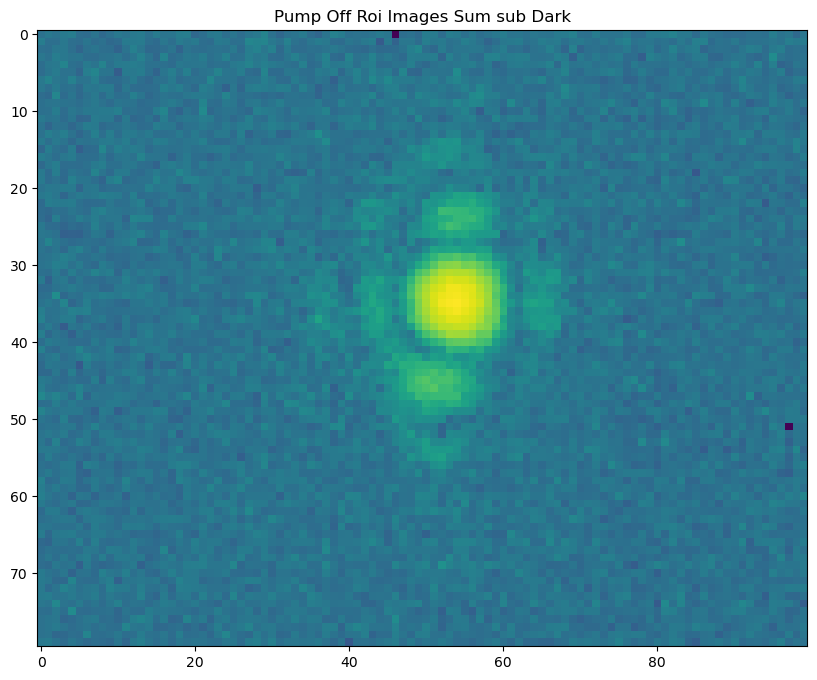

In [40]:
from src.preprocessor.generic_preprocessors import subtract_dark
no_zeros = np.maximum(poff_images, 0)
no_zero_sub_darks = subtract_dark(no_zeros)

roi_no_zero_sub_darks = roi_rect.slice(no_zero_sub_darks)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax.imshow(np.log1p(roi_no_zero_sub_darks.sum(0)))
ax.set_title(f"Pump Off Roi Images Sum sub Dark")

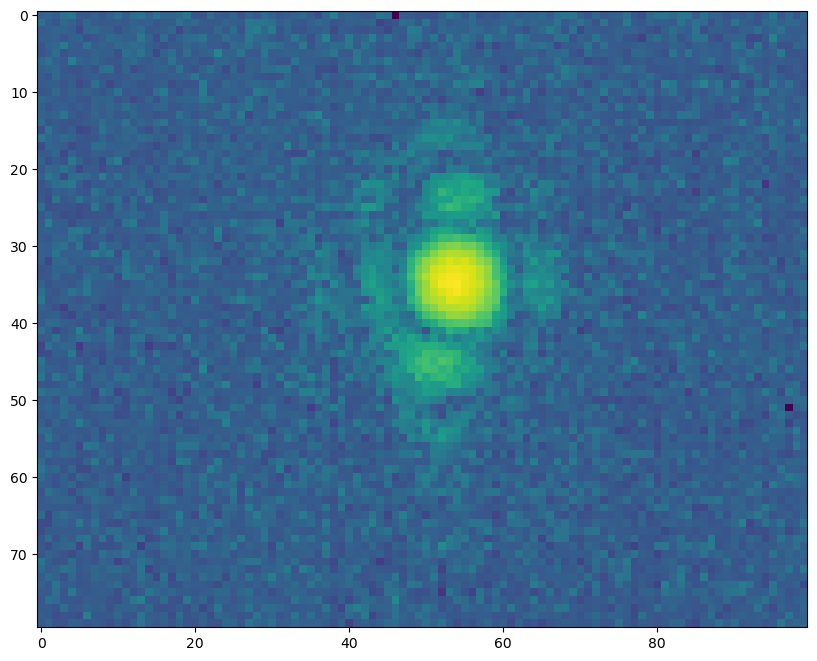

In [45]:
from src.preprocessor.image_qbpm_preprocessor import remove_outliers_using_ransac
ransac_poff_images, ransac_poff_qbpm = remove_outliers_using_ransac((no_zero_sub_darks, poff_qbpm))
roi_ransac_poff_images = roi_rect.slice(ransac_poff_images)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(np.log1p(roi_ransac_poff_images.sum(0)))

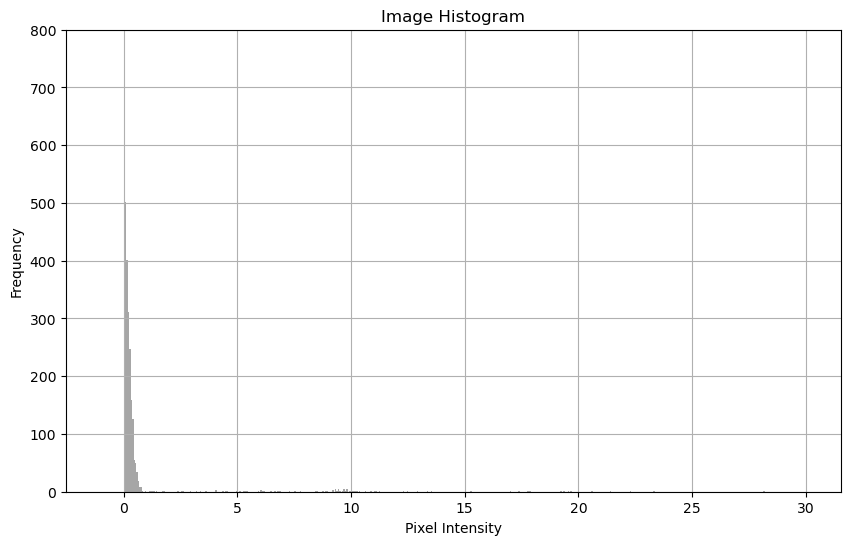

In [46]:
image = roi_ransac_poff_images[0]
hist, bins = np.histogram(image.flatten(), bins=500, range=[-1,30])

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(image.flatten(), bins=500, range=[-1,30], color='gray', alpha=0.7)
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.ylim(None, 800)
plt.grid(True)
plt.show()